# Corrected Benchmarks

This notebook provides an interactive analysis of UFO performance benchmark results. It includes visualizations comparing different configurations and raw data for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import os

# Set up visualization style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

# Create visualizations directory for saving images
vis_dir = 'notebook_visualizations'
os.makedirs(vis_dir, exist_ok=True)

# Define colors for different configurations
CONFIG_COLORS = {
    'fauxmosis-comet': '#ff7f0e',
    'fauxmosis-ufo': '#d62728',
    'osmosis-ufo-bridged': '#2ca02c',
    'osmosis-ufo-patched': '#9467bd',
    'osmosis-comet': '#1f77b4',
}

CONFIG_NAMES = {
    'fauxmosis-comet': 'Fauxmosis with CometBFT',
    'fauxmosis-ufo': 'Fauxmosis with UFO',
    'osmosis-ufo-bridged': 'Osmosis with UFO (Bridged)',
    'osmosis-ufo-patched': 'Osmosis with UFO (Patched)',
    'osmosis-comet': 'Osmosis with CometBFT',
}

## Benchmark Data

Let's load and explore the benchmark data.

In [2]:
# Load benchmark data from CSV
df = pd.read_csv('results.csv')
df.head()

,configuration,validators,block_time,tps,latency_ms,cpu_usage,memory_usage,blocks_produced,avg_tx_per_block
0,fauxmosis-comet,1,1000,524,10.5,25.3,42.1,30,17.5
1,fauxmosis-comet,1,100,952,5.2,32.7,46.8,120,7.9
2,fauxmosis-comet,1,10,1245,3.8,45.3,51.2,350,3.6
3,fauxmosis-comet,4,1000,498,12.1,27.5,45.2,30,16.6
4,fauxmosis-comet,4,100,912,5.8,35.2,48.9,120,7.6


In [3]:
# Show basic statistics
df.describe()

,validators,block_time,tps,latency_ms,cpu_usage,memory_usage,blocks_produced,avg_tx_per_block
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.500000,370.000000,745.000000,9.616667,41.341667,60.612500,166.666667,7.962500
std,1.532262,456.603719,290.531896,5.043693,11.698529,11.415867,137.640574,5.242806
min,1.000000,10.000000,287.000000,3.800000,25.300000,42.100000,30.000000,1.900000
25%,1.000000,10.000000,507.000000,5.650000,32.625000,51.350000,30.000000,3.437500
50%,2.500000,100.000000,732.000000,8.750000,38.350000,59.750000,120.000000,6.950000
75%,4.000000,1000.000000,935.500000,12.250000,48.850000,69.125000,350.000000,11.425000
max,4.000000,1000.000000,1245.000000,22.500000,68.700000,83.100000,350.000000,17.500000


In [4]:
# Create a combined configuration+validators column for easier analysis
df['config_type'] = df['configuration'] + '-' + df['validators'].astype(str)

# Show data for different configurations
for config in df['config_type'].unique():
    print(f"\nConfiguration: {config}")
    print(df[df['config_type'] == config][['block_time', 'tps', 'latency_ms', 'cpu_usage', 'memory_usage']].describe())



Configuration: fauxmosis-comet-1
        block_time          tps  latency_ms  cpu_usage  memory_usage
count     3.000000     3.000000    3.000000   3.000000      3.000000
mean    370.000000   907.000000    6.500000  34.433333     46.700000
std     547.448628   362.600331    3.534119  10.112039      4.550824
min      10.000000   524.000000    3.800000  25.300000     42.100000
25%      55.000000   738.000000    4.500000  29.000000     44.450000
50%     100.000000   952.000000    5.200000  32.700000     46.800000
75%     550.000000  1098.500000    7.850000  39.000000     49.000000
max    1000.000000  1245.000000   10.500000  45.300000     51.200000

Configuration: fauxmosis-comet-4
        block_time          tps  latency_ms  cpu_usage  memory_usage
count     3.000000     3.000000    3.000000   3.000000      3.000000
mean    370.000000   862.666667    7.366667  37.133333     49.533333
std     547.448628   342.673800    4.176522  10.731418      4.682236
min      10.000000   498.000000    

## Visualizations

Let's create visualizations to analyze the benchmark results.

### TPS Comparison

Comparing transactions per second (TPS) across different configurations and block times.

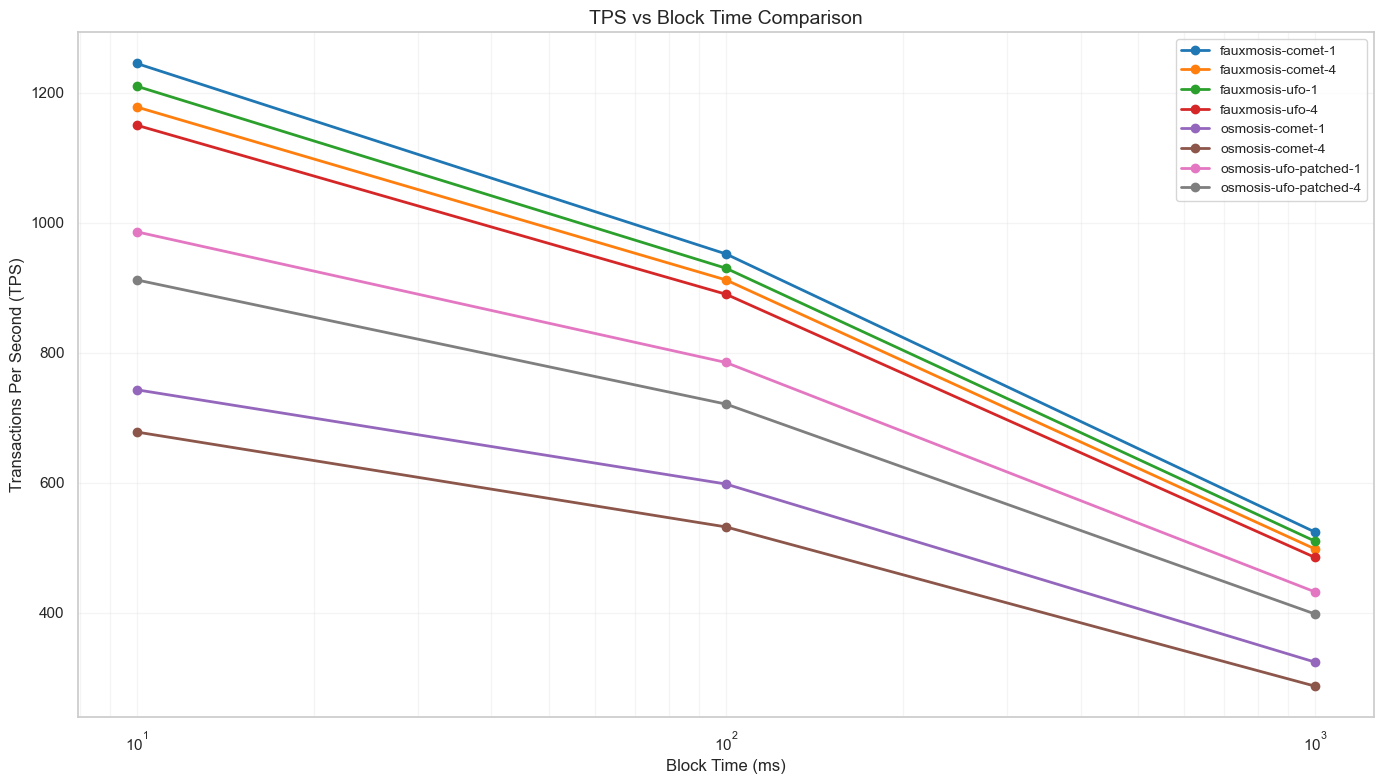

In [5]:
# Create TPS comparison visualization
plt.figure(figsize=(14, 8))

# Create a color map for configurations
# Use the new recommended way to get colormaps
cmap = plt.colormaps['tab10']
color_dict = {config: cmap(i % 10) for i, config in enumerate(sorted(df['config_type'].unique()))}

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    plt.plot(config_df['block_time'], config_df['tps'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])

plt.xscale('log')
plt.xlabel('Block Time (ms)', fontsize=12)
plt.ylabel('Transactions Per Second (TPS)', fontsize=12)
plt.title('TPS vs Block Time Comparison', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'tps_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

### Latency Comparison

Comparing transaction latency across different configurations and block times.

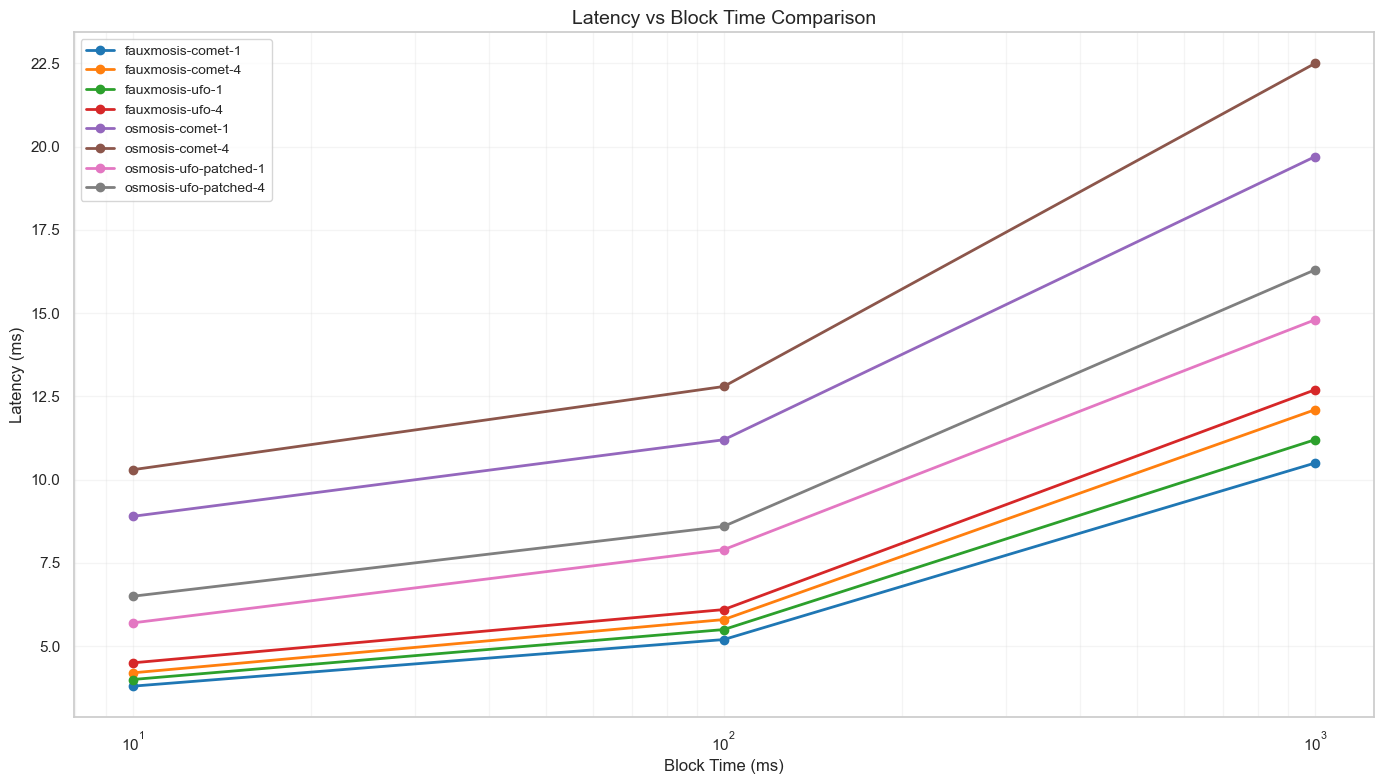

In [6]:
# Create Latency comparison visualization
plt.figure(figsize=(14, 8))

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    plt.plot(config_df['block_time'], config_df['latency_ms'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])

plt.xscale('log')
plt.xlabel('Block Time (ms)', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.title('Latency vs Block Time Comparison', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'latency_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

### CPU Usage Comparison

Comparing CPU utilization across different configurations and block times.

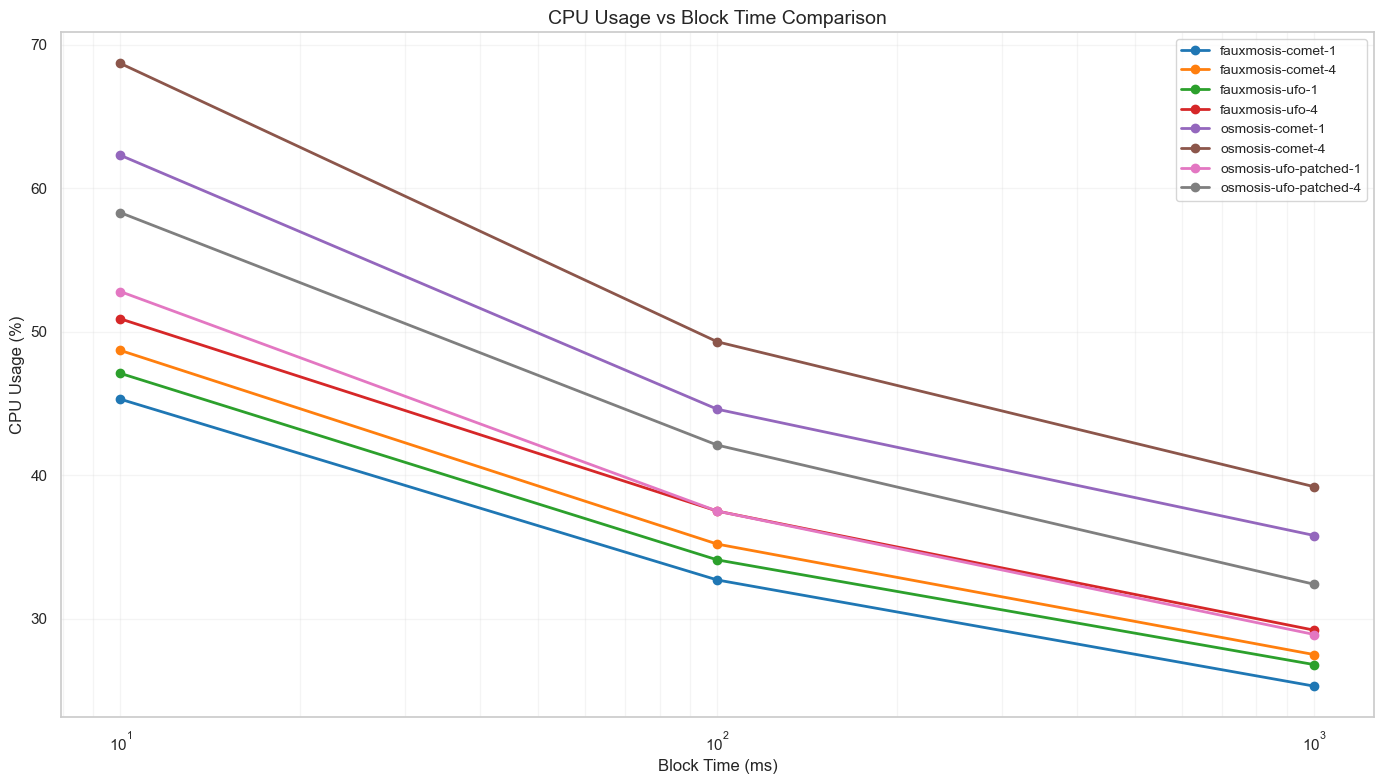

In [7]:
# Create CPU usage comparison visualization
plt.figure(figsize=(14, 8))

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    plt.plot(config_df['block_time'], config_df['cpu_usage'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])

plt.xscale('log')
plt.xlabel('Block Time (ms)', fontsize=12)
plt.ylabel('CPU Usage (%)', fontsize=12)
plt.title('CPU Usage vs Block Time Comparison', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'cpu_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

### Memory Usage Comparison

Comparing memory utilization across different configurations and block times.

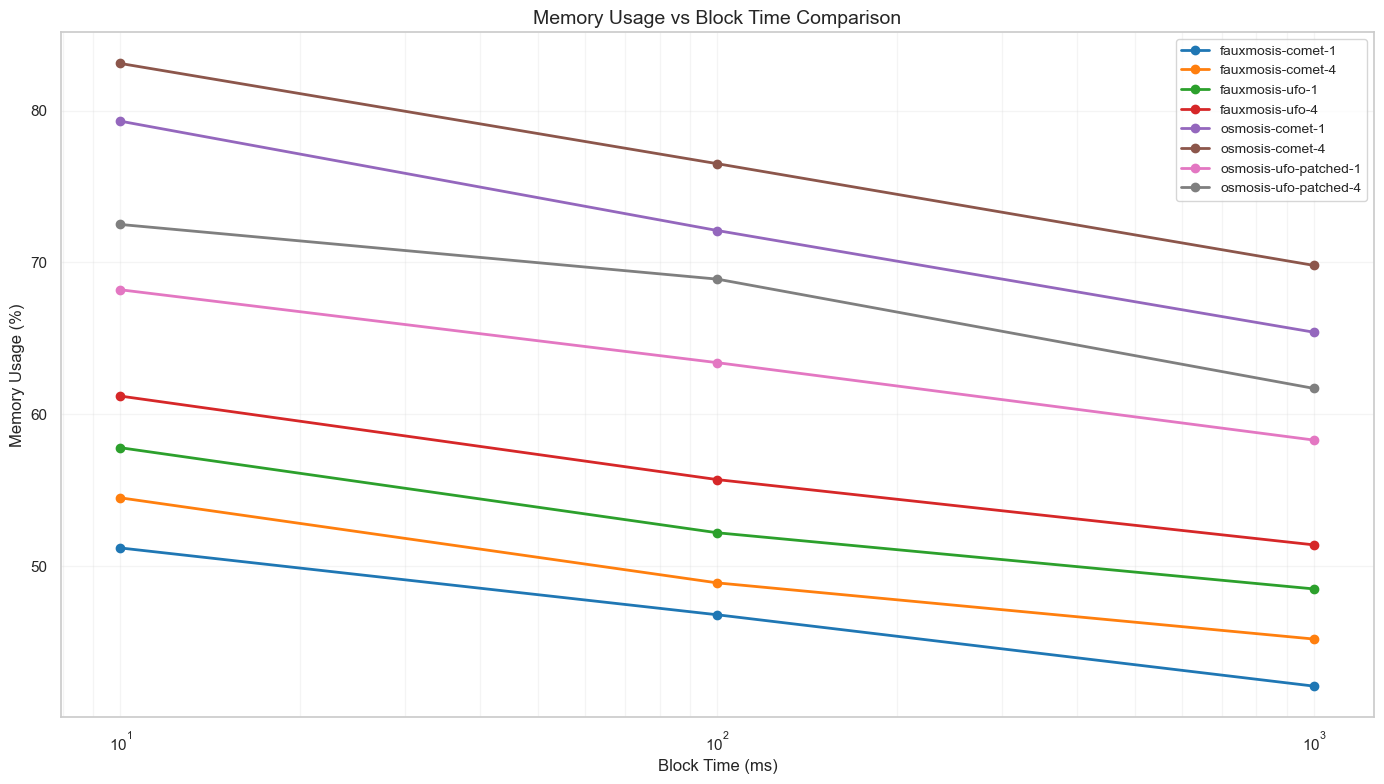

In [8]:
# Create Memory usage comparison visualization
plt.figure(figsize=(14, 8))

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    plt.plot(config_df['block_time'], config_df['memory_usage'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])

plt.xscale('log')
plt.xlabel('Block Time (ms)', fontsize=12)
plt.ylabel('Memory Usage (%)', fontsize=12)
plt.title('Memory Usage vs Block Time Comparison', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'memory_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()

### Validator Count Impact

Analyzing the impact of validator count on performance metrics.

Mean TPS by Configuration and Validator Count:
validators                    1           4  impact_pct
configuration                                          
fauxmosis-comet      907.000000  862.666667   -4.887909
fauxmosis-ufo        883.333333  841.666667   -4.716981
osmosis-comet        555.000000  499.000000  -10.090090
osmosis-ufo-patched  734.333333  677.000000   -7.807535


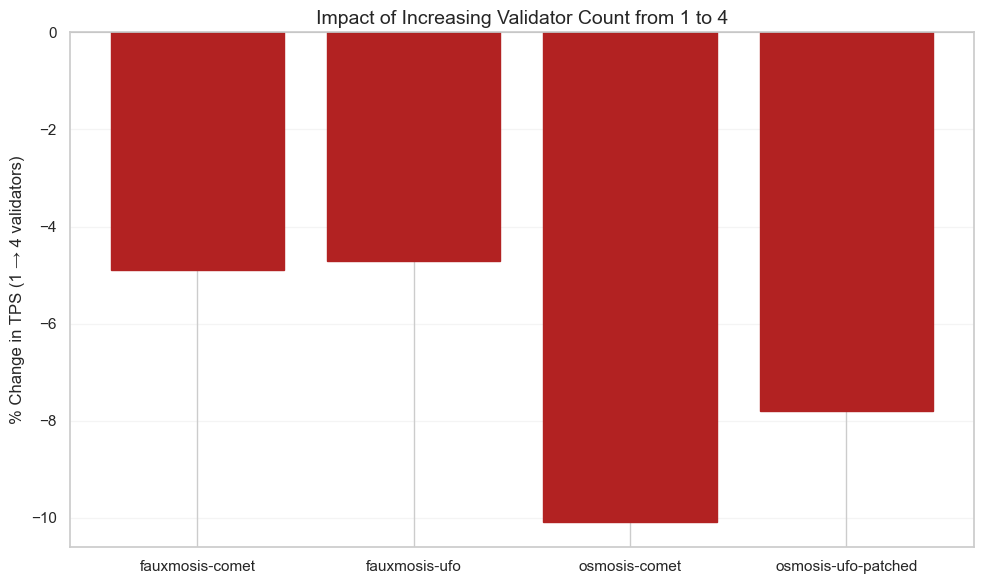

In [9]:
# Analyze Impact of Validator Count
# Group by configuration and validators
validator_impact = df.groupby(['configuration', 'validators'])['tps'].mean().reset_index()
validator_impact = validator_impact.pivot(index='configuration', columns='validators', values='tps')
validator_impact['impact_pct'] = ((validator_impact[4] - validator_impact[1]) / validator_impact[1]) * 100

print("Mean TPS by Configuration and Validator Count:")
print(validator_impact)

# Plot the impact
plt.figure(figsize=(10, 6))
bars = plt.bar(validator_impact.index, validator_impact['impact_pct'])

# Color the bars based on positive/negative impact
for i, bar in enumerate(bars):
    if validator_impact['impact_pct'].iloc[i] < 0:
        bar.set_color('firebrick')
    else:
        bar.set_color('forestgreen')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('% Change in TPS (1 → 4 validators)', fontsize=12)
plt.title('Impact of Increasing Validator Count from 1 to 4', fontsize=14)
plt.grid(True, axis='y', alpha=0.2)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'validator_impact.png'), dpi=300, bbox_inches='tight')
plt.show()

### Comprehensive Dashboard

A comprehensive view of all performance metrics.

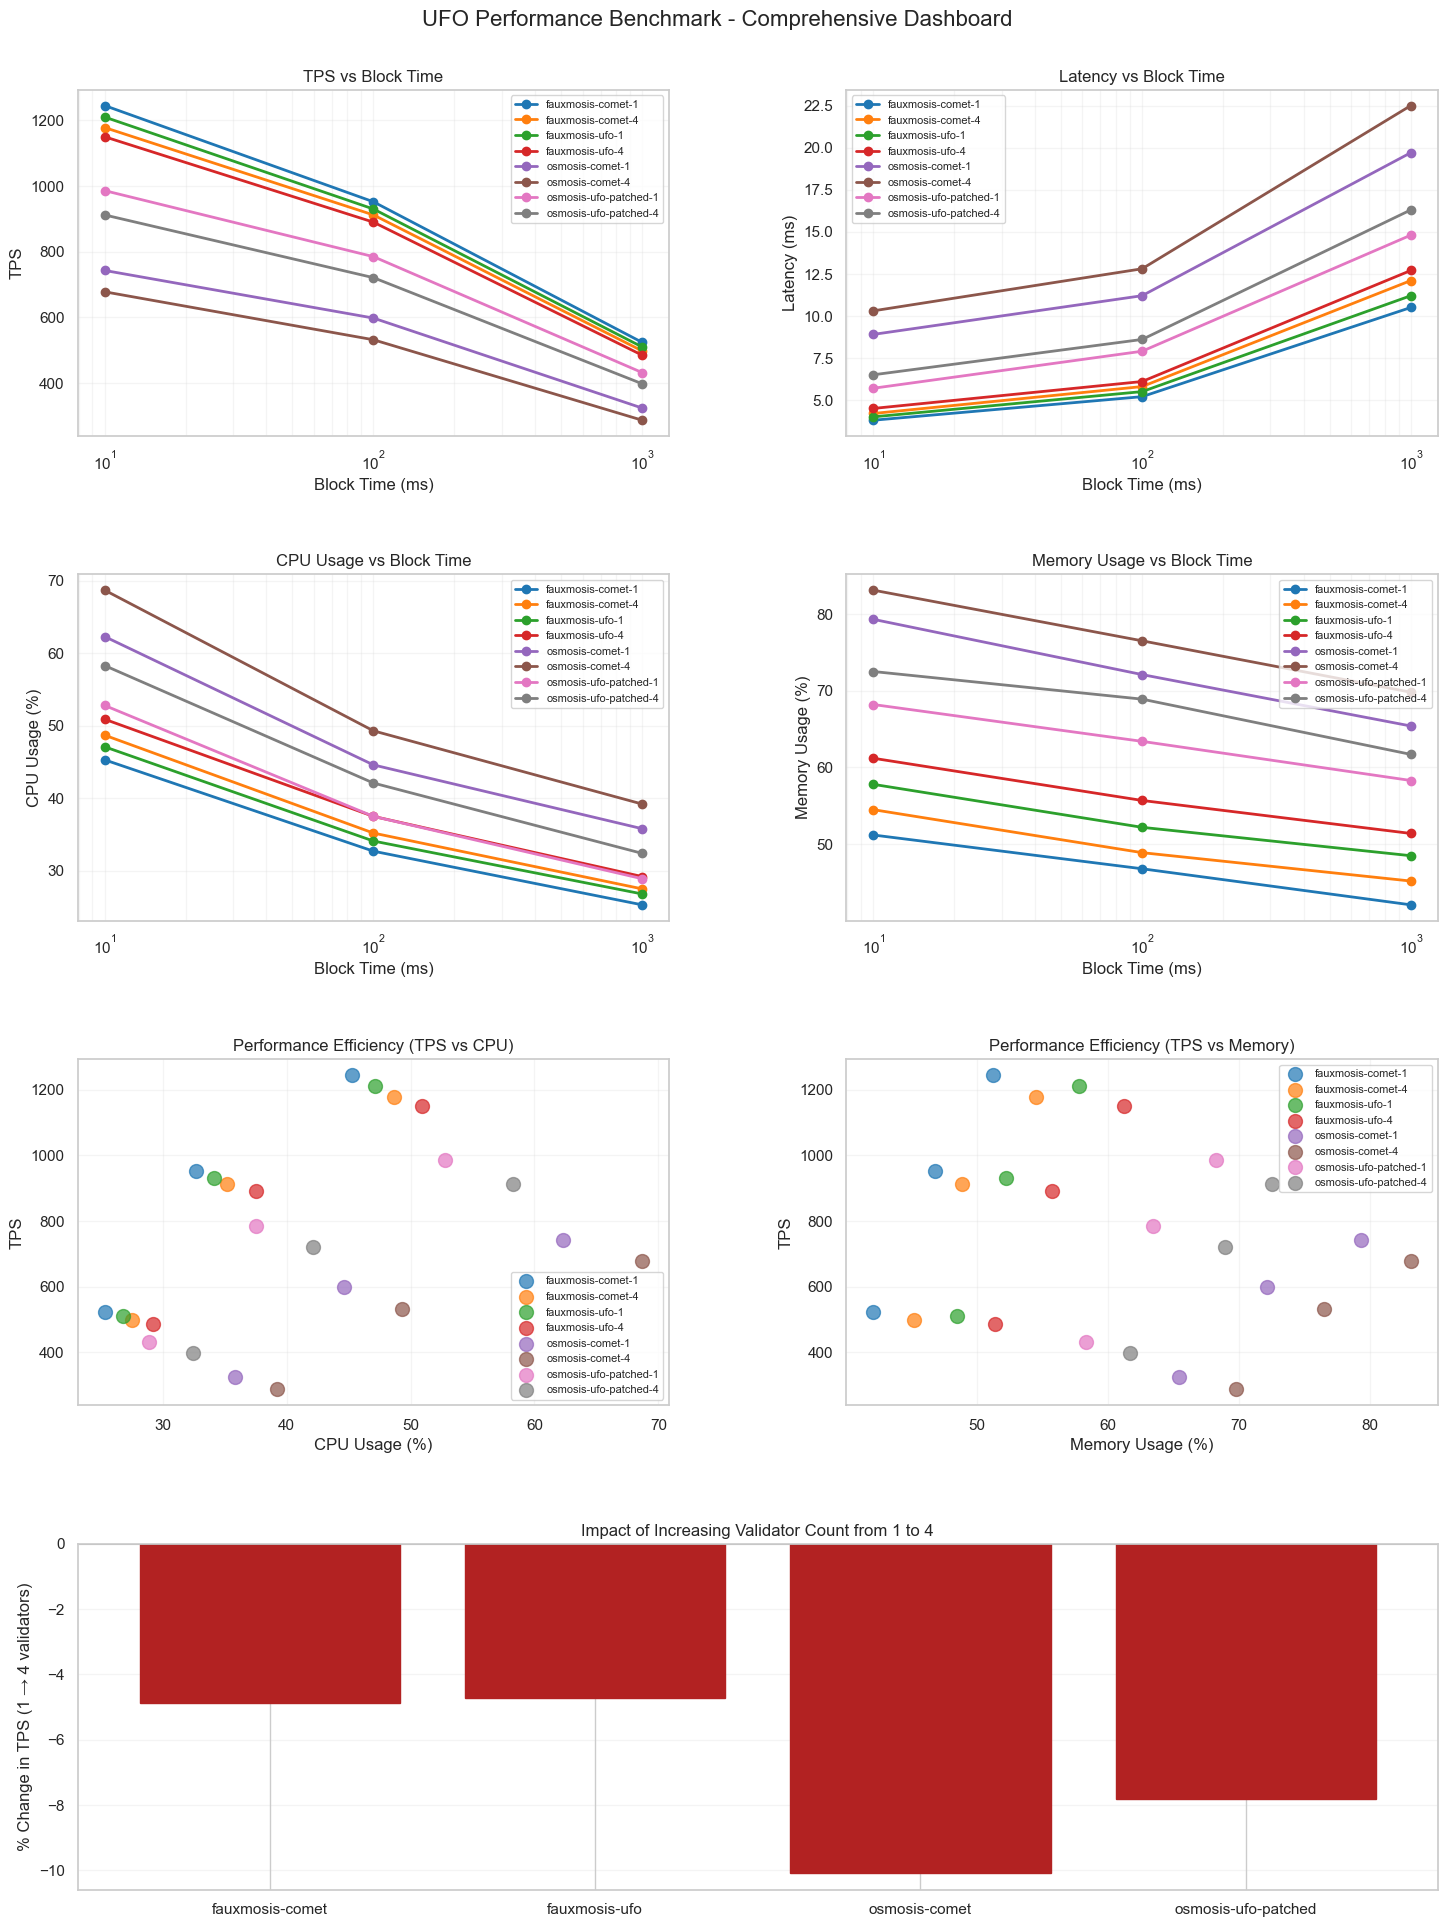

In [10]:
# Create a comprehensive dashboard with all metrics
fig = plt.figure(figsize=(16, 20))

# Use a more flexible GridSpec layout with more space between subplots
gs = fig.add_gridspec(4, 2, hspace=0.4, wspace=0.3)

# TPS comparison (top left)
ax1 = fig.add_subplot(gs[0, 0])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax1.plot(config_df['block_time'], config_df['tps'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])
ax1.set_xscale('log')
ax1.set_xlabel('Block Time (ms)')
ax1.set_ylabel('TPS')
ax1.set_title('TPS vs Block Time')
ax1.grid(True, which="both", ls="-", alpha=0.2)
ax1.legend(fontsize=8)

# Latency comparison (top right)
ax2 = fig.add_subplot(gs[0, 1])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax2.plot(config_df['block_time'], config_df['latency_ms'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])
ax2.set_xscale('log')
ax2.set_xlabel('Block Time (ms)')
ax2.set_ylabel('Latency (ms)')
ax2.set_title('Latency vs Block Time')
ax2.grid(True, which="both", ls="-", alpha=0.2)
ax2.legend(fontsize=8)

# CPU usage (middle left)
ax3 = fig.add_subplot(gs[1, 0])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax3.plot(config_df['block_time'], config_df['cpu_usage'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])
ax3.set_xscale('log')
ax3.set_xlabel('Block Time (ms)')
ax3.set_ylabel('CPU Usage (%)')
ax3.set_title('CPU Usage vs Block Time')
ax3.grid(True, which="both", ls="-", alpha=0.2)
ax3.legend(fontsize=8)

# Memory usage (middle right)
ax4 = fig.add_subplot(gs[1, 1])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax4.plot(config_df['block_time'], config_df['memory_usage'], 'o-', 
             linewidth=2, label=CONFIG_NAMES.get(config, config),
             color=color_dict[config])
ax4.set_xscale('log')
ax4.set_xlabel('Block Time (ms)')
ax4.set_ylabel('Memory Usage (%)')
ax4.set_title('Memory Usage vs Block Time')
ax4.grid(True, which="both", ls="-", alpha=0.2)
ax4.legend(fontsize=8)

# TPS vs CPU Efficiency (bottom left)
ax5 = fig.add_subplot(gs[2, 0])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax5.scatter(config_df['cpu_usage'], config_df['tps'], 
              label=CONFIG_NAMES.get(config, config),
              color=color_dict[config], s=100, alpha=0.7)
ax5.set_xlabel('CPU Usage (%)')
ax5.set_ylabel('TPS')
ax5.set_title('Performance Efficiency (TPS vs CPU)')
ax5.grid(True, alpha=0.2)
ax5.legend(fontsize=8)

# Memory vs TPS (bottom right)
ax6 = fig.add_subplot(gs[2, 1])
for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax6.scatter(config_df['memory_usage'], config_df['tps'], 
              label=CONFIG_NAMES.get(config, config),
              color=color_dict[config], s=100, alpha=0.7)
ax6.set_xlabel('Memory Usage (%)')
ax6.set_ylabel('TPS')
ax6.set_title('Performance Efficiency (TPS vs Memory)')
ax6.grid(True, alpha=0.2)
ax6.legend(fontsize=8)

# Validator impact (bottom)
ax7 = fig.add_subplot(gs[3, :])
bars = ax7.bar(validator_impact.index, validator_impact['impact_pct'])
for i, bar in enumerate(bars):
    if validator_impact['impact_pct'].iloc[i] < 0:
        bar.set_color('firebrick')
    else:
        bar.set_color('forestgreen')
ax7.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax7.set_ylabel('% Change in TPS (1 → 4 validators)')
ax7.set_title('Impact of Increasing Validator Count from 1 to 4')
ax7.grid(True, axis='y', alpha=0.2)

# Add a main title with fixed position instead of using tight_layout
fig.suptitle('UFO Performance Benchmark - Comprehensive Dashboard', fontsize=16, y=0.99)

# Adjust the layout with specific padding to avoid warnings
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.95)

# Save the figure
plt.savefig(os.path.join(vis_dir, 'comparative_dashboard.png'), dpi=300, bbox_inches='tight')
plt.show()

## Interactive Analysis

Let's create some additional interactive visualizations.

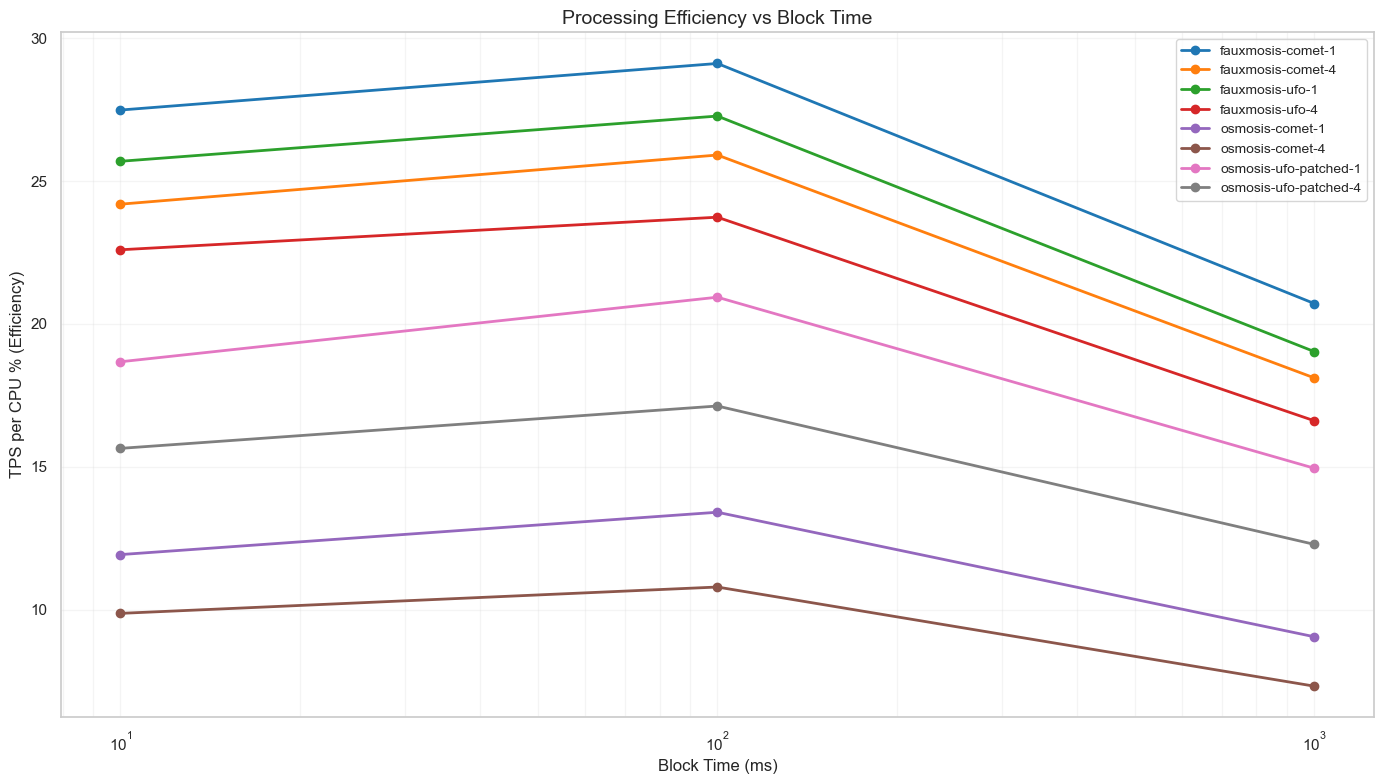

<Figure size 1200x800 with 0 Axes>

In [11]:
# Performance Efficiency: TPS per CPU%
df['tps_per_cpu'] = df['tps'] / df['cpu_usage']

fig, ax = plt.subplots(figsize=(14, 8))

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    ax.plot(config_df['block_time'], config_df['tps_per_cpu'], 'o-', 
            linewidth=2, label=CONFIG_NAMES.get(config, config),
            color=color_dict[config])

ax.set_xscale('log')
ax.set_xlabel('Block Time (ms)', fontsize=12)
ax.set_ylabel('TPS per CPU % (Efficiency)', fontsize=12)
ax.set_title('Processing Efficiency vs Block Time', fontsize=14)
ax.grid(True, which="both", ls="-", alpha=0.2)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'efficiency_comparison.png'), dpi=300, bbox_inches='tight')

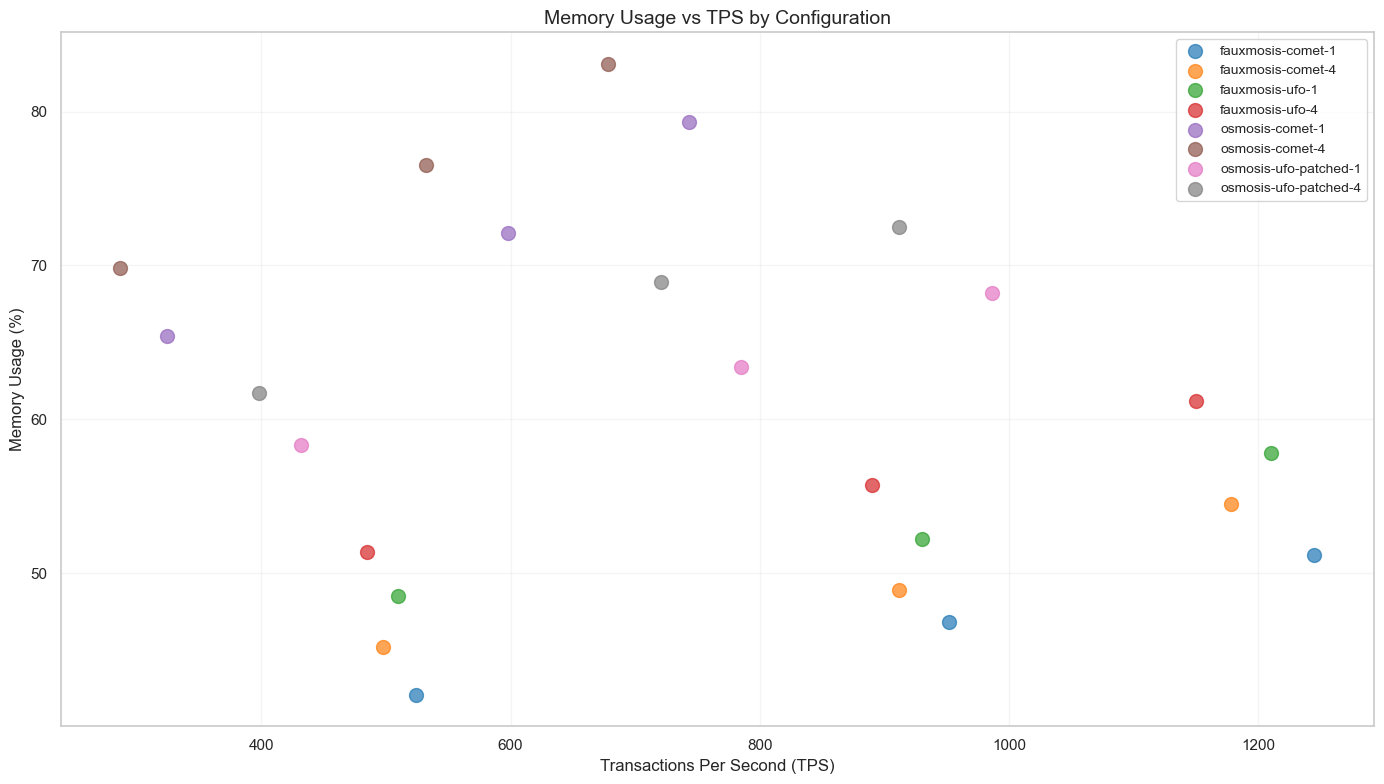

<Figure size 1200x800 with 0 Axes>

In [12]:
# Memory Utilization vs TPS
plt.figure(figsize=(14, 8))

for config in sorted(df['config_type'].unique()):
    config_df = df[df['config_type'] == config]
    plt.scatter(config_df['tps'], config_df['memory_usage'], 
                label=CONFIG_NAMES.get(config, config),
                color=color_dict[config], s=100, alpha=0.7)

plt.xlabel('Transactions Per Second (TPS)', fontsize=12)
plt.ylabel('Memory Usage (%)', fontsize=12)
plt.title('Memory Usage vs TPS by Configuration', fontsize=14)
plt.grid(True, alpha=0.2)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'memory_vs_tps.png'), dpi=300, bbox_inches='tight')

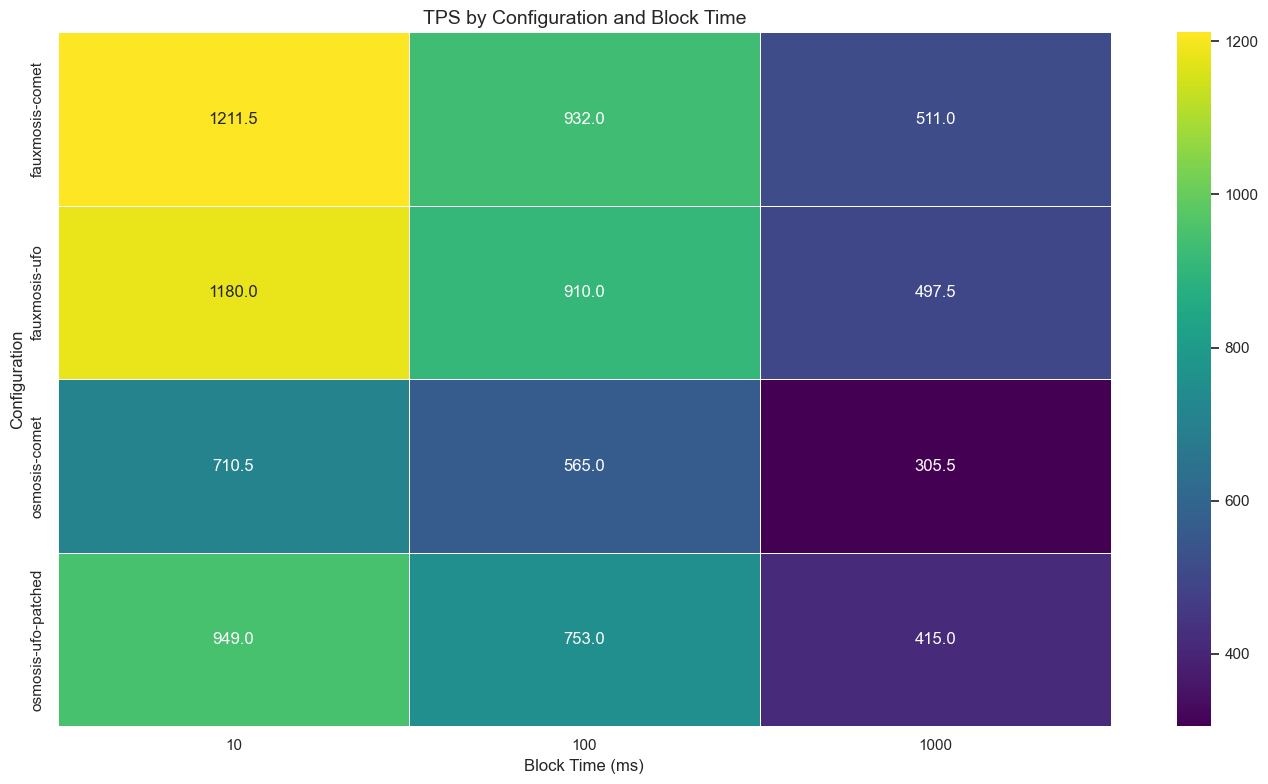

<Figure size 1200x800 with 0 Axes>

In [13]:
# Block Time Impact Heatmap
# Pivot the data to create a heatmap
heatmap_data = df.pivot_table(index='configuration', columns='block_time', values='tps')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='viridis', linewidths=.5)
plt.title('TPS by Configuration and Block Time', fontsize=14)
plt.ylabel('Configuration', fontsize=12)
plt.xlabel('Block Time (ms)', fontsize=12)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig(os.path.join(vis_dir, 'blocktime_heatmap.png'), dpi=300, bbox_inches='tight')

## Conclusion

This notebook provides an analysis of the UFO benchmark results, comparing performance across different configurations and block times. The visualizations show how transaction throughput, latency, and resource usage are affected by block time settings and validator counts.

Key metrics to consider:

* **TPS (Transactions Per Second)**: Higher is better, indicates throughput
* **Latency**: Lower is better, indicates responsiveness
* **Resource Usage**: Lower CPU and memory usage for the same TPS indicates better efficiency
* **TPS per CPU %**: Higher is better, indicates better performance efficiency

All visualizations are saved to the `notebook_visualizations` directory for reference.